# Dask arrays

Let's explore Dask arrays!

In [1]:
import numpy as np
import dask.array as da

Let's create a random dask array, do some operation and visualize it:

In [8]:
x = da.random.random((2000, 2000), chunks=(500, 500))
x

dask.array<random_sample, shape=(2000, 2000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

In [3]:
x = da.random.random((20000, 20000), chunks='auto')
x

dask.array<random_sample, shape=(20000, 20000), dtype=float64, chunksize=(4096, 4096), chunktype=numpy.ndarray>

In [9]:
y = x.mean()

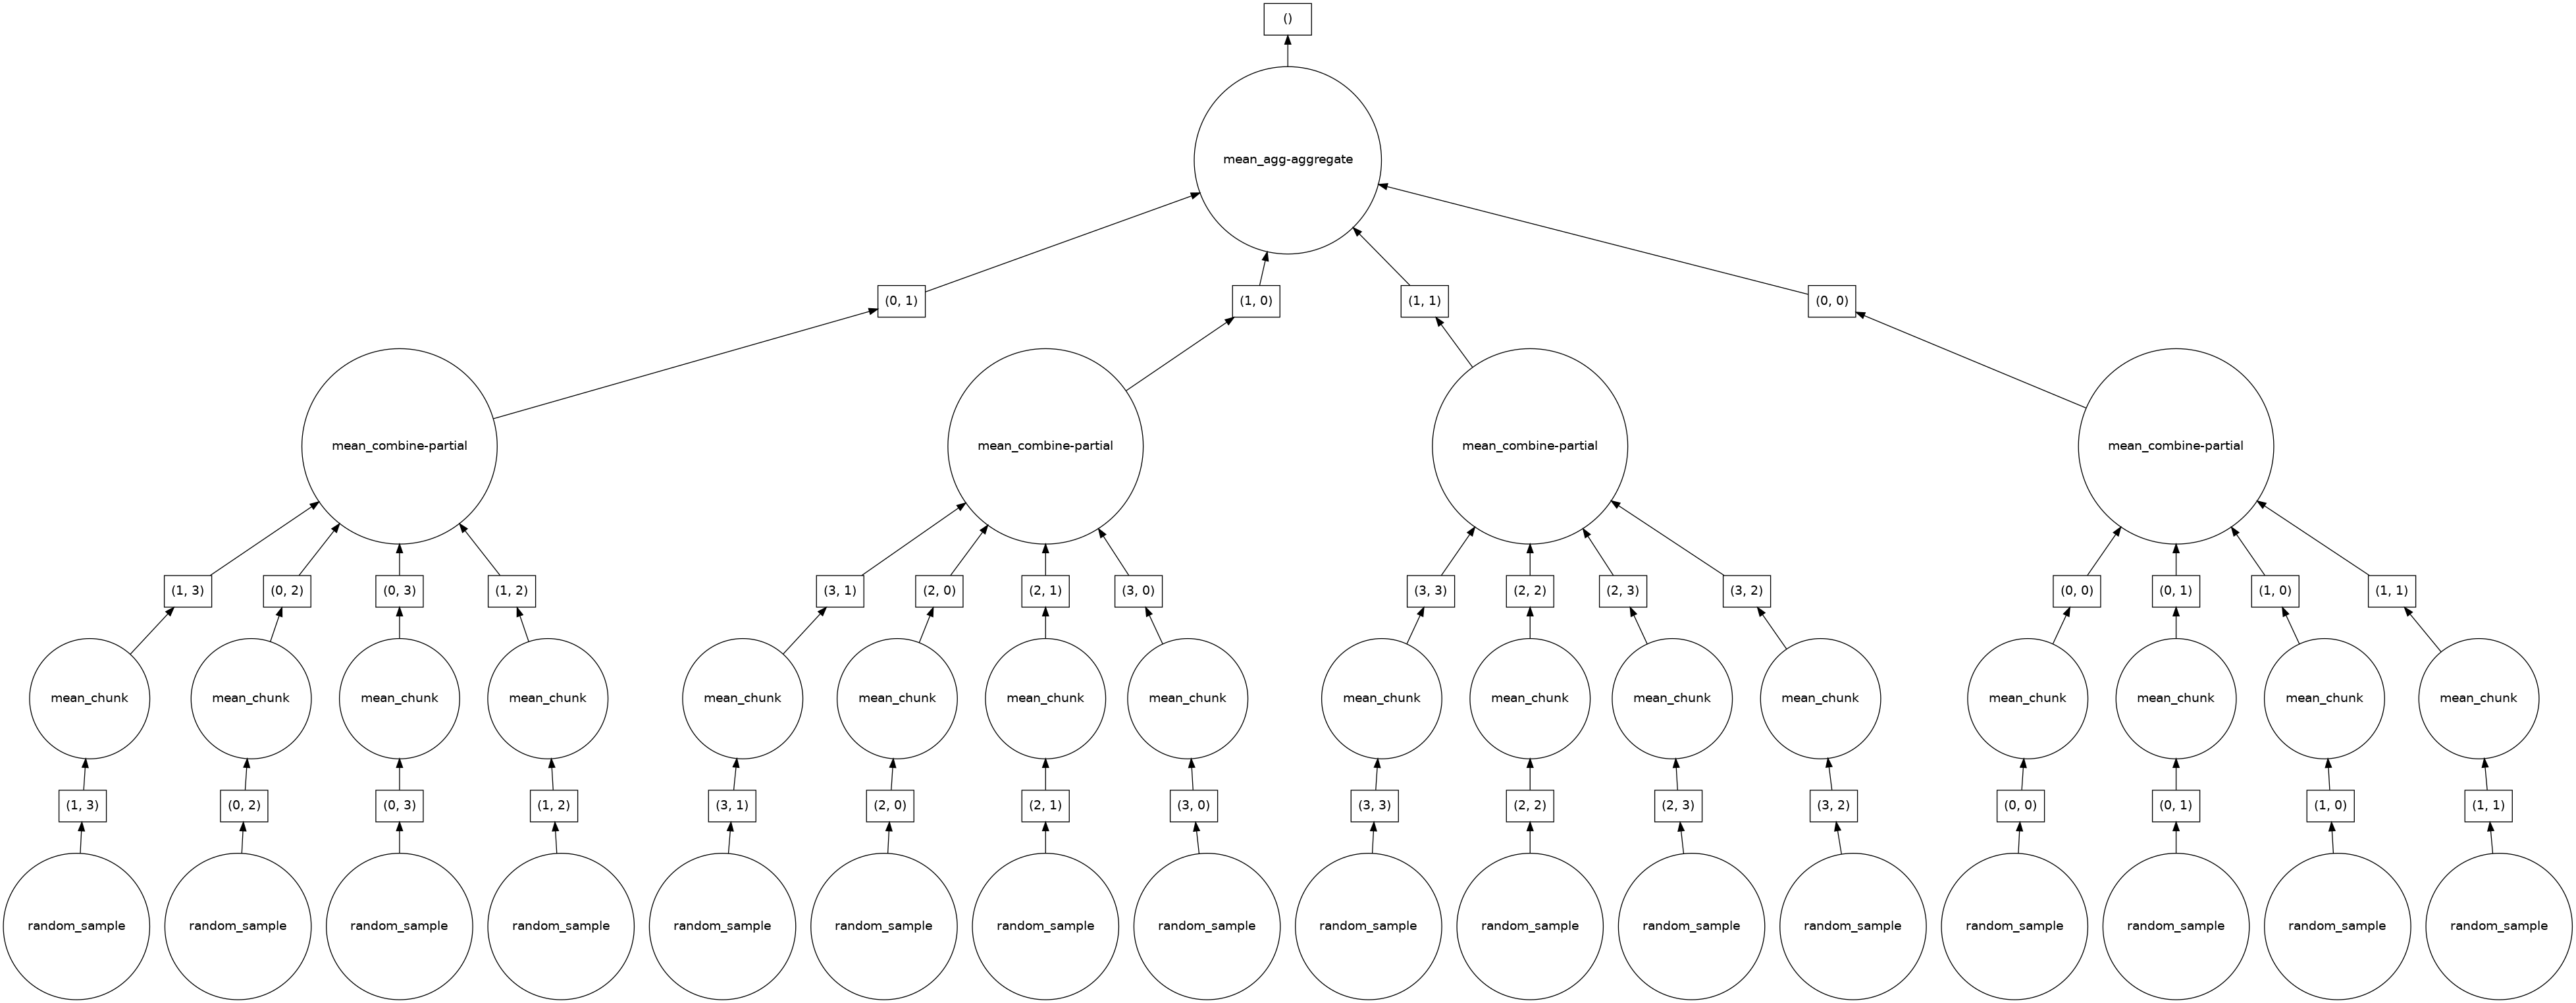

In [10]:
y.visualize()

Let's increase the size of the array and compute the operation.

In [11]:
%%time
N = 20000
x = da.random.random((N, N))
y = x.mean()
y.compute()

CPU times: user 5.69 s, sys: 1.49 s, total: 7.19 s
Wall time: 634 ms


0.500009383904002

Let's compare the results with NumPy:

In [12]:
%%time
N = 20000
rng = np.random.default_rng()
x = rng.random((N, N))
x.mean()

CPU times: user 2.11 s, sys: 715 ms, total: 2.82 s
Wall time: 2.82 s


0.49999230800226363

<mark>**Question**</mark>: Try the two cells above with `N = 200`. Which one is faster, the numpy version or the dask one?

***

Let's consider now the operation `x.dot(x)`. <mark>**Question**</mark>: Could you explain the results of the timings?

In [13]:
%%time
N = 2000
x = rng.random((N, N))
y = x.dot(x)

CPU times: user 569 ms, sys: 98.4 ms, total: 668 ms
Wall time: 173 ms


In [16]:
N = 20
x = da.random.random((N, N), chunks=(500, 500))
y = x.dot(x)

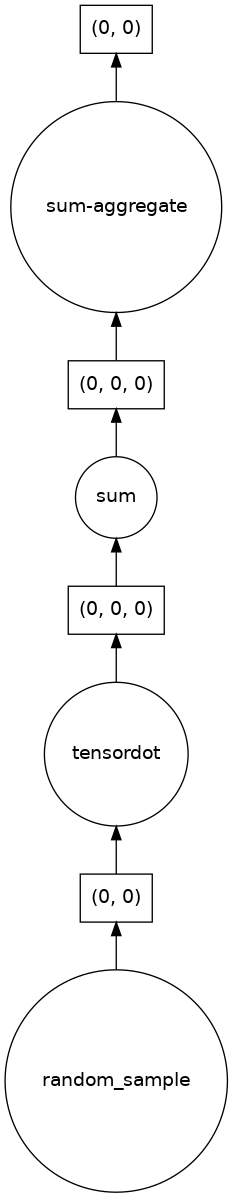

In [17]:
y.visualize()

In [ ]:
%%time
y.compute().shape